In [2]:
import sys
print (sys.version, get_ipython())
!wget https://www.dropbox.com/s/9wjmwjc14ckcw9q/root-6.26.04-install.zip
!unzip "/content/root-6.26.04-install.zip"
!apt-get install libgsl-dev

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] <google.colab._shell.Shell object at 0x7fc4f909f3d0>
--2022-07-27 14:50:29--  https://www.dropbox.com/s/9wjmwjc14ckcw9q/root-6.26.04-install.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9wjmwjc14ckcw9q/root-6.26.04-install.zip [following]
--2022-07-27 14:50:30--  https://www.dropbox.com/s/raw/9wjmwjc14ckcw9q/root-6.26.04-install.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc56c8f9d8f4135f487b7f4751db.dl.dropboxusercontent.com/cd/0/inline/Bp531z4DyxhmPxjZs71kXMkTi6LZGjsfD1fHmXKhF3gHMjJvVq4xTsHudiB4P-Z_DtDZcEpe-V4jniStguRx2EIJdTz9mRtmrmayjUouVZYGO6OmBuN6v23mgvLi6sEjAF-ysS937m5EfmBijnxJ5iDOLWYgOqanrot0cQbU56Mo8g/file# [following]
--2022-07-27 14:50:31--

In [3]:
!source root-6.26.04-install/bin/thisroot.sh

In [4]:
import sys
sys.path.append("/content/root-6.26.04-install/")
sys.path.append("/content/root-6.26.04-install/bin/")
sys.path.append("/root-6.26.04-install/include/")
sys.path.append("/content/root-6.26.04-install/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libTreePlayer.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/root-6.26.04-install/lib/libGraf.so')


<CDLL '/content/root-6.26.04-install/lib/libGraf.so', handle 4a3f700 at 0x7fc4e0446590>

In [5]:
import ROOT

Welcome to JupyROOT 6.26/04


Saving CTR5.0.Wfm1000.csv to CTR5.0.Wfm1000.csv
==> Number of files: 1.
==> Processing file: 1/1.
Total Lines 1000
Fit results: Constant= 174.99398723403687  +/-  1.7643084268699156
Fit results: Mean= 224.77181036692363  +/-  0.286707391780364
Fit results: Sigma= 35.730558534109576  +/-  0.2214537158203882
Fit results: FWHM= 84.14546534782805  +/-  0.5215235007570141
Fit results: rough FWHM = 85.0  +/-  2.5
==> End.
******************************************************************************
*Tree    :tree      : CTR                                                    *
*Entries :    16005 : Total =          129581 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :time      : time/D                                                 *
*Entries :    16005 : Total  Size=     129287 bytes  All baskets in memory   *
*Baskets :        4 : Baske

Warning in <TROOT::Append>: Replacing existing TH1: h_time_lowres (Potential memory leak).
Info in <TCanvas::Print>: pdf file CTR_lowres0.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_time (Potential memory leak).
Info in <TCanvas::Print>: pdf file CTR0.pdf has been created


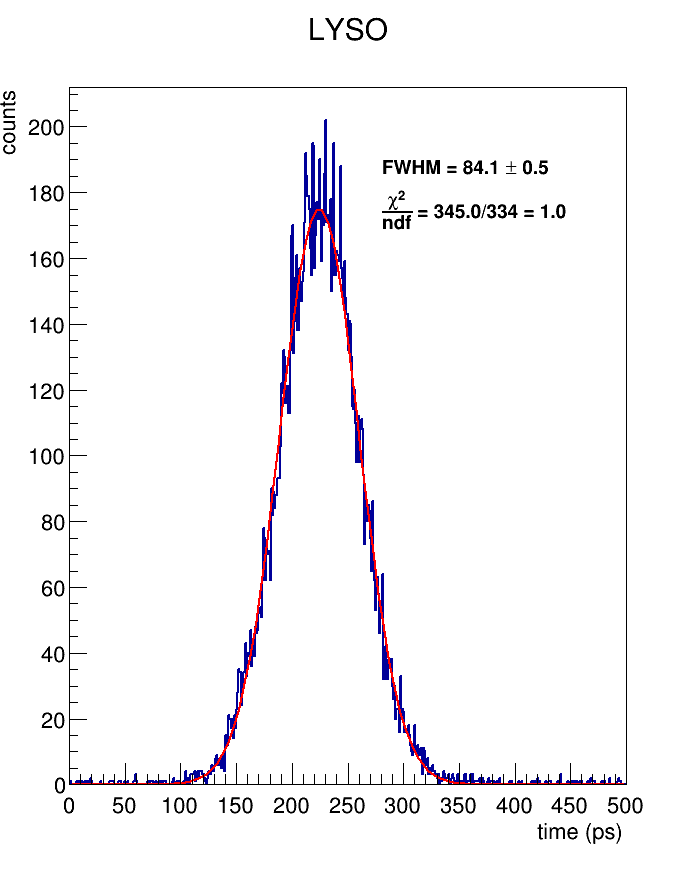

In [19]:
import os
import numpy as np
from array import array
import warnings
import math
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from collections.abc import Iterable
from google.colab import files
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile, TPaveText, TLatex
from ROOT import gROOT, gBenchmark

gROOT.Reset()
gROOT.GetListOfCanvases().Clear()

# Input parameters
bin_size = 0.5 # bin precision for the data of the csv input file
units = 1.0 # convertion factor in ps
#nbins is the number of bins for the fitted histogram (e.g. 500 bins mean that bin size is 1 ps). 
#The bin size has to be larger than the bin precision.
nbins = 500 

# Do not edit beyond this line
np.seterr(all='warn')
c1 = TCanvas('c1', 'CTR distribution', 200, 10, 700, 900)
uploaded = files.upload()
n_signals = len(uploaded)
print("==> Number of files: %d." % n_signals)
for i, file in enumerate(uploaded):
  print("==> Processing file: %d/%d." % (i + 1, n_signals))
  signal = np.loadtxt(file, dtype=np.double)
  total_sum_of_squares = np.sum((signal - np.mean(signal)) ** 2)
  t = np.arange(len(signal), dtype=np.double)*bin_size
  tree = ROOT.TTree("tree","CTR")
  time_arr = array('d', [0])
  tree.Branch("time", time_arr, "time/D") # D for doubles
  for counts in range(0, len(signal)):
    for k in range(0, int(signal[counts])):
      time_arr[0] = t[counts]
      tree.Fill()
  print('Total Lines', counts + 1)
  tree.Print()
  time_max = units*bin_size*(counts+1)
  nbins_lowres = int(nbins/5)
  h_time_lowres = ROOT.TH1D("h_time_lowres", "", nbins_lowres, 0., time_max)
  tree.Draw("time>>h_time_lowres")
  c1.Update()
  c1.Print("CTR_lowres"+str(i)+".pdf")
  h_time = ROOT.TH1D("h_time", "", nbins, 0., time_max)
  h_time.SetStats(0)
  h_time.SetLineWidth(2)
  h_time.SetTitle("LYSO; time (ps); counts");
  tree.Draw("time>>h_time")
  c1.Update()
  #func = ROOT.TF1("func","gaus(0)+gaus(3)", 0., time_max)
  #func.SetParameters(5.,5.,1.,1.,10.,1.)
  func = ROOT.TF1("func","gaus", 0., time_max)
  #func.SetParameters(500.,1860.,5.5)
  h_fit = h_time.Fit(func,"SE")
  print ("Fit results: Constant=",func.GetParameter(0)," +/- ",func.GetParError(0))
  print ("Fit results: Mean=",func.GetParameter(1)," +/- ",func.GetParError(1))
  print ("Fit results: Sigma=",func.GetParameter(2)," +/- ",func.GetParError(2))
  FWHM = 2.355*func.GetParameter(2)
  e_FWHM = 2.355*func.GetParError(2)
  print ("Fit results: FWHM=",FWHM," +/- ",e_FWHM)
  maxbin = h_time_lowres.GetMaximumBin()
  npoints = 3
  summax = 0
  for m in range(-math.floor(npoints/2)+maxbin, math.ceil(npoints/2)+maxbin):
     summax = summax+h_time_lowres.GetBinContent(m)
  meanmax = summax/npoints
  bin1 = h_time_lowres.FindFirstBinAbove(meanmax/2)
  bin2 = h_time_lowres.FindLastBinAbove(meanmax/2)
  FWHM_rough = h_time_lowres.GetBinCenter(bin2+1) - h_time_lowres.GetBinCenter(bin1-1)
  e_FWHM_rough = 0.5*time_max/nbins_lowres
  print ("Fit results: rough FWHM =",FWHM_rough," +/- ",e_FWHM_rough)
  latex = ROOT.TLatex()
  latex.SetNDC()
  latex.SetTextSize(0.03)
  chi2 = func.GetChisquare()
  ndof = func.GetNDF()
  latex.DrawLatex(0.55 ,0.75,'#frac{#chi^{2}}{ndf} = %.1f/%d = %.1f'%(chi2, ndof, chi2/ndof))
  latex.DrawLatex(0.55 ,0.80, 'FWHM = %.1f #pm %.1f'%(FWHM,e_FWHM))
  #c1.BuildLegend();
  c1.Update()
  c1.Print("CTR"+str(i)+".pdf")
  print('==> End.')
  myfile = TFile("CTR"+str(i)+".root", 'RECREATE' )
  tree.Write()
  h_time.Write()
  myfile.Close()

gROOT.GetListOfCanvases().Draw()
for file in uploaded:
  os.remove(file)
